# Kindergarten Prediction Per School
Is there a relationship between the number of kindergarteners enrolling in the district in a given year, and the number of births in the ECASD boundaries five years earlier? If so, can we quantify how strong the relationship is?

## Kindergartener Enrollemnt and Births Five Years Prior
Using birth data from the Wisconsin Department of Health Services and enrollment data from ECASD, we can create a dataframe containing the total kindergarten enrollment for ECASD each year with the number of births five years prior.

### Data

In [1]:
from data.kindergarten import get_kindergarten_enrollment_by_year
from data import births

yearly_district_kindergarten_enrollment = get_kindergarten_enrollment_by_year(1995, 2020).to_frame()
births_five_years_ago = births.reindex(range(1995, 2025)).shift(periods=5).dropna()
df1 = yearly_district_kindergarten_enrollment.join(births_five_years_ago).dropna()

print(df1)

      Kindergarteners  Births
Year                         
2000              771  1011.0
2001              711   955.0
2002              732   972.0
2003              691   919.0
2004              679  1005.0
2005              715  1004.0
2006              746  1053.0
2007              727  1039.0
2008              729  1009.0
2009              724  1020.0
2010              727  1074.0
2011              750  1070.0
2012              824  1035.0
2013              797  1073.0
2014              742  1017.0
2015              730  1001.0
2016              770   987.0
2017              729  1042.0
2018              764  1002.0
2019              763  1080.0


### Graph

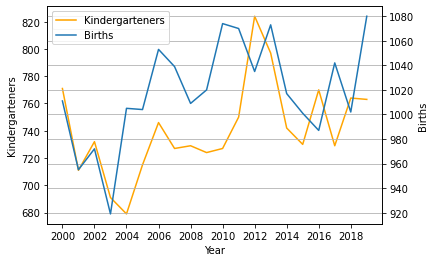

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

g1 = sns.lineplot(x="Year", y="Kindergarteners", data=df1.reset_index(), ax=ax1, color="orange", label="Kindergarteners")
sns.lineplot(x="Year", y="Births", data=df1.reset_index(), ax=ax2, label="Births")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)

g1.set(xticks=range(df1.index.min(), df1.index.max()+1, 2))

plt.grid()
plt.show()

There appears to be some relationship between the variables, but it doesn't appear to be very strong. Let's run a linear regression model to determine the strength of the relationship.

### Regression Model Graph

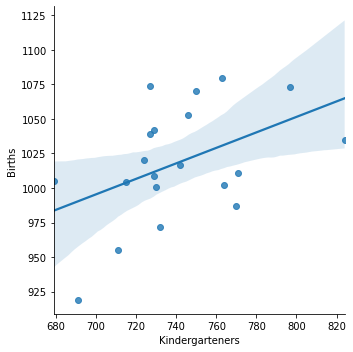

In [3]:
sns.lmplot(x="Kindergarteners", y="Births", data=df1)
plt.show()

### OLS Regression Summary

In [4]:
import statsmodels.formula.api as smf

lm = smf.ols(formula="Kindergarteners ~ Births", data=df1.dropna()).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Kindergarteners   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     4.759
Date:                Sun, 23 Aug 2020   Prob (F-statistic):             0.0426
Time:                        18:15:47   Log-Likelihood:                -96.053
No. Observations:                  20   AIC:                             196.1
Df Residuals:                      18   BIC:                             198.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    361.7537    174.008      2.079      0.0

### Findings
Our initial findings show there is little relationship between the variables. The p-value is uncomfortably close to 0.05 and the r-squared value is low.

## Applying a Rolling Average to the Birth Data
We may be able to get a better model by applying a three year rolling average to the birth data.

### Data

In [5]:
rolling_average_births_five_years_ago = births.reindex(range(1995, 2025)).shift(periods=5).rolling(window=3, min_periods=3).mean().dropna()
df2 = yearly_district_kindergarten_enrollment.join(rolling_average_births_five_years_ago).dropna()

print(df2)

      Kindergarteners       Births
Year                              
2002              732   979.333333
2003              691   948.666667
2004              679   965.333333
2005              715   976.000000
2006              746  1020.666667
2007              727  1032.000000
2008              729  1033.666667
2009              724  1022.666667
2010              727  1034.333333
2011              750  1054.666667
2012              824  1059.666667
2013              797  1059.333333
2014              742  1041.666667
2015              730  1030.333333
2016              770  1001.666667
2017              729  1010.000000
2018              764  1010.333333
2019              763  1041.333333


### Graph

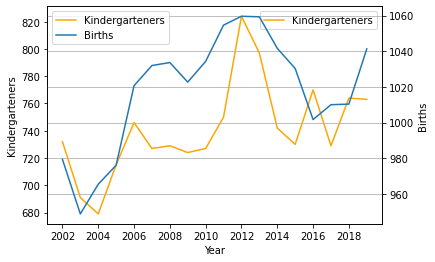

In [6]:
fig2, ax3 = plt.subplots()
ax4 = ax3.twinx()

g2 = sns.lineplot(x="Year", y="Kindergarteners", data=df2.reset_index(), ax=ax3, color="orange", label="Kindergarteners")
sns.lineplot(x="Year", y="Births", data=df2.reset_index(), ax=ax4, label="Births")

lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax4.legend(lines3 + lines4, labels3 + labels4, loc=0)

g2.set(xticks=range(df2.index.min(), df2.index.max()+1, 2))

plt.grid()
plt.show()

There's a definite improvement, but how does it compare to the previous model? Let's run a linear regression to find out.

### Regression Model Graph

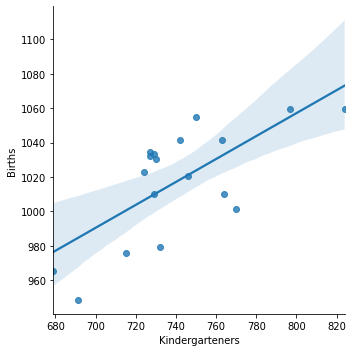

In [7]:
sns.lmplot(x="Kindergarteners", y="Births", data=df2)
plt.show()

### OLS Regression Summary

In [8]:
lm = smf.ols(formula="Kindergarteners ~ Births", data=df2.dropna()).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Kindergarteners   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     15.83
Date:                Sun, 23 Aug 2020   Prob (F-statistic):            0.00108
Time:                        18:15:48   Log-Likelihood:                -82.548
No. Observations:                  18   AIC:                             169.1
Df Residuals:                      16   BIC:                             170.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.6612    191.047     -0.098      0.9

/home/jhendric/.local/share/virtualenvs/ecasd-enrollment-otYJYCmf/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Findings
Using a three year rolling average of births five years prior has significantly improved the model. The p-value is near zero and the r-squared value has increased to 0.497. There is still room for improvement, but we have proven a relationship between the two variables.